In [3]:
import torch
import numpy as np
import os
os.chdir('..')

import torch_converter as tc
import instance_generator as ig
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from util import NumpyDataset, Dataset
from evaluate import evaluate_model, pp_output

%load_ext autoreload
%autoreload 2

In [4]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 2.0.0+cu117
Using device: cuda:2


In [5]:
GNN1, args1 = load('GNN1', device)
GNN2, args2 = load('GNN2', device)

### I. Meta GNN training/evaluation

In [8]:
args = {
    'processor':         'GENConv',
    'head':              'meta',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 50; test_num = 10

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 4,
    'weighted': False
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

rng = np.random.default_rng()

train_instances = [
    *ig.sample_instances(6, 10, train_num, rng, **er_config),
    *ig.sample_instances(6, 10, train_num, rng, **ba_config),
    *ig.sample_instances(6, 10, train_num, rng, **geom_config),
    *ig.sample_instances(8, 8, train_num, rng, **er_config),
    *ig.sample_instances(8, 8, train_num, rng, **ba_config),
    *ig.sample_instances(8, 8, train_num, rng, **geom_config),
    *ig.sample_instances(10, 6, train_num, rng, **er_config),
    *ig.sample_instances(10, 6, train_num, rng, **ba_config),
    *ig.sample_instances(10, 6, train_num, rng, **geom_config)
]


test_instances = [
    *ig.sample_instances(6, 10, test_num, rng, **er_config),
    *ig.sample_instances(6, 10, test_num, rng, **ba_config),
    *ig.sample_instances(6, 10, test_num, rng, **geom_config),
    *ig.sample_instances(8, 8, test_num, rng, **er_config),
    *ig.sample_instances(8, 8, test_num, rng, **ba_config),
    *ig.sample_instances(8, 8, test_num, rng, **geom_config),
    *ig.sample_instances(10, 6, test_num, rng, **er_config),
    *ig.sample_instances(10, 6, test_num, rng, **ba_config),
    *ig.sample_instances(10, 6, test_num, rng, **geom_config)
]

kwargs={'models': [GNN1, GNN2], 'device': device}
train_data = Dataset(tc._instances_to_gnn_train_samples(train_instances, args['head'], **kwargs))
test_data = Dataset(tc._instances_to_gnn_train_samples(test_instances, args['head'], **kwargs))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [9]:
_, _, META_GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

0.4251044006539572


Training:   4%|▍         | 1/25 [00:03<01:35,  3.96s/Epochs]

TEST LOSS: 0.2754508852958679


Training:   8%|▊         | 2/25 [00:07<01:18,  3.42s/Epochs]

0.30538397504264725
0.29252645685207734


Training:  12%|█▏        | 3/25 [00:11<01:28,  4.03s/Epochs]

TEST LOSS: 0.25221389532089233


Training:  16%|█▌        | 4/25 [00:14<01:13,  3.49s/Epochs]

0.281899751155369
0.27427149071782


Training:  20%|██        | 5/25 [00:17<01:09,  3.46s/Epochs]

TEST LOSS: 0.2371561974287033


Training:  24%|██▍       | 6/25 [00:20<01:01,  3.21s/Epochs]

0.2735231701988185
0.26528490392416254


Training:  28%|██▊       | 7/25 [00:23<00:58,  3.24s/Epochs]

TEST LOSS: 0.23222728073596954


Training:  32%|███▏      | 8/25 [00:26<00:52,  3.08s/Epochs]

0.26807585269120454
0.26478365214062916


Training:  36%|███▌      | 9/25 [00:29<00:50,  3.17s/Epochs]

TEST LOSS: 0.23579274117946625


Training:  40%|████      | 10/25 [00:32<00:44,  2.98s/Epochs]

0.26676924547912906
0.26565293122555816


Training:  44%|████▍     | 11/25 [00:35<00:43,  3.10s/Epochs]

TEST LOSS: 0.2211281806230545


Training:  48%|████▊     | 12/25 [00:38<00:39,  3.02s/Epochs]

0.2600991751202858
0.2666263163089752


Training:  52%|█████▏    | 13/25 [00:42<00:38,  3.19s/Epochs]

TEST LOSS: 0.2252323478460312


Training:  56%|█████▌    | 14/25 [00:44<00:33,  3.03s/Epochs]

0.26166285305015813
0.26001604074848694


Training:  60%|██████    | 15/25 [00:48<00:31,  3.13s/Epochs]

TEST LOSS: 0.2273768186569214


Training:  64%|██████▍   | 16/25 [00:50<00:26,  2.97s/Epochs]

0.2592369959265824
0.25855962106317926


Training:  68%|██████▊   | 17/25 [00:54<00:25,  3.18s/Epochs]

TEST LOSS: 0.22159679234027863


Training:  72%|███████▏  | 18/25 [00:57<00:21,  3.06s/Epochs]

0.26181231008225553
0.2540067446028854


Training:  76%|███████▌  | 19/25 [01:00<00:18,  3.16s/Epochs]

TEST LOSS: 0.23038426041603088


Training:  80%|████████  | 20/25 [01:03<00:14,  2.97s/Epochs]

0.25729269863282195
0.25621949325405036


Training:  84%|████████▍ | 21/25 [01:06<00:12,  3.04s/Epochs]

TEST LOSS: 0.21860650181770325


Training:  88%|████████▊ | 22/25 [01:09<00:08,  2.90s/Epochs]

0.2568627093414035
0.2581256513256038


Training:  92%|█████████▏| 23/25 [01:12<00:05,  2.99s/Epochs]

TEST LOSS: 0.22108285129070282


Training:  96%|█████████▌| 24/25 [01:14<00:02,  2.90s/Epochs]

0.24895487071559894
0.2524373590669396


Training: 100%|██████████| 25/25 [01:18<00:00,  3.13s/Epochs]

TEST LOSS: 0.21863102912902832


In [14]:
seed = 0
(m, n) = (8, 16)
config = er_config

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios1 = evaluate_model(
    classify_model=META_GNN,
    eval_models=[GNN1, GNN2],
    device=device,
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios1, _, show_log=False)
print()
print()

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios2 = evaluate_model(
    classify_model=None,
    eval_models=[GNN1],
    device=device,
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios2, _, show_log=False)

print()
print()

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios = evaluate_model(
    classify_model=None,
    eval_models=[GNN2],
    device=device,
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios, _, show_log=False)

-- Competitive ratios --
GNN: 0.9764
Greedy: 0.995


-- Competitive ratios --
GNN: 0.9537
Greedy: 0.995


-- Competitive ratios --
GNN: 0.9764
Greedy: 0.995


### II. Meta NN training

In [26]:
train_num = 50; test_num = 10

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 4,
    'weighted': False
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

args = {
    'processor':         'NN',
    'head':              'meta',
    'num_layers':        5,
    'input_dim':         17,
    'batch_size':        4,
    'hidden_dim':        16,
    'output_dim':        3,
    'dropout':           0,
    'epochs':            50,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}


rng = np.random.default_rng()

train_instances = [
    *ig.sample_instances(6, 10, train_num, rng, **er_config),
    *ig.sample_instances(6, 10, train_num, rng, **ba_config),
    *ig.sample_instances(6, 10, train_num, rng, **geom_config),
    *ig.sample_instances(8, 8, train_num, rng, **er_config),
    *ig.sample_instances(8, 8, train_num, rng, **ba_config),
    *ig.sample_instances(8, 8, train_num, rng, **geom_config),
    *ig.sample_instances(10, 6, train_num, rng, **er_config),
    *ig.sample_instances(10, 6, train_num, rng, **ba_config),
    *ig.sample_instances(10, 6, train_num, rng, **geom_config)
]


test_instances = [
    *ig.sample_instances(6, 10, test_num, rng, **er_config),
    *ig.sample_instances(6, 10, test_num, rng, **ba_config),
    *ig.sample_instances(6, 10, test_num, rng, **geom_config),
    *ig.sample_instances(8, 8, test_num, rng, **er_config),
    *ig.sample_instances(8, 8, test_num, rng, **ba_config),
    *ig.sample_instances(8, 8, test_num, rng, **geom_config),
    *ig.sample_instances(10, 6, test_num, rng, **er_config),
    *ig.sample_instances(10, 6, test_num, rng, **ba_config),
    *ig.sample_instances(10, 6, test_num, rng, **geom_config)
]

kwargs={'models': [GNN1, GNN2], 'device': device}
train_dataset = NumpyDataset(
    tc._instances_to_nn_samples(
        instances=train_instances,
        models=[GNN1, GNN2],
        args=args,
        batch_size=100,
        rng=rng
    )
)

test_dataset = NumpyDataset(
   tc._instances_to_nn_samples(
        instances=test_instances,
        models=[GNN1, GNN2],
        args=args,
        batch_size=100,
        rng=rng
    )
)


train_loader = DataLoader(
    train_dataset,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_dataset,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [28]:
args = {
    'processor':         'NN',
    'head':              'meta',
    'num_layers':        5,
    'input_dim':         23,
    'batch_size':        10,
    'hidden_dim':        18,
    'output_dim':        3,
    'dropout':           0,
    'epochs':            50,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0005,
    'device':            device
}

_, _, META_NN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/50 [00:00<?, ?Epochs/s]

0.6681415383021037


Training:   2%|▏         | 1/50 [00:01<00:52,  1.07s/Epochs]

TEST LOSS: 0.6495861411094666


Training:   4%|▍         | 2/50 [00:01<00:41,  1.16Epochs/s]

0.627047778500451
0.5991690598593817


Training:   6%|▌         | 3/50 [00:02<00:44,  1.05Epochs/s]

TEST LOSS: 0.604001522064209


Training:   8%|▊         | 4/50 [00:03<00:41,  1.11Epochs/s]

0.5891773664951324
0.574743733935886


Training:  10%|█         | 5/50 [00:04<00:42,  1.07Epochs/s]

TEST LOSS: 0.565726637840271


Training:  12%|█▏        | 6/50 [00:05<00:38,  1.13Epochs/s]

0.536023996869723
0.4921372880869442


Training:  14%|█▍        | 7/50 [00:06<00:41,  1.03Epochs/s]

TEST LOSS: 0.45715048909187317


Training:  16%|█▌        | 8/50 [00:07<00:39,  1.07Epochs/s]

0.47346887681219313
0.465134133166737


Training:  18%|█▊        | 9/50 [00:08<00:39,  1.03Epochs/s]

TEST LOSS: 0.4261339008808136


Training:  20%|██        | 10/50 [00:09<00:36,  1.10Epochs/s]

0.4535149387187428
0.4481741734345754


Training:  22%|██▏       | 11/50 [00:10<00:37,  1.04Epochs/s]

TEST LOSS: 0.40810269117355347


Training:  24%|██▍       | 12/50 [00:11<00:33,  1.12Epochs/s]

0.44045468939675225
0.43607665982511307


Training:  26%|██▌       | 13/50 [00:12<00:35,  1.05Epochs/s]

TEST LOSS: 0.3998669683933258


Training:  28%|██▊       | 14/50 [00:12<00:32,  1.11Epochs/s]

0.4295238575670454
0.42960567030641766


Training:  30%|███       | 15/50 [00:14<00:33,  1.06Epochs/s]

TEST LOSS: 0.39452582597732544


Training:  32%|███▏      | 16/50 [00:14<00:30,  1.13Epochs/s]

0.42713136818673875
0.423244014746613


Training:  34%|███▍      | 17/50 [00:15<00:31,  1.05Epochs/s]

TEST LOSS: 0.38385647535324097


Training:  36%|███▌      | 18/50 [00:16<00:27,  1.15Epochs/s]

0.42160974532365797
0.4200232190721565


Training:  38%|███▊      | 19/50 [00:17<00:28,  1.09Epochs/s]

TEST LOSS: 0.37977227568626404


Training:  40%|████      | 20/50 [00:18<00:25,  1.18Epochs/s]

0.41893848578135173
0.4169432520866394


Training:  42%|████▏     | 21/50 [00:19<00:27,  1.07Epochs/s]

TEST LOSS: 0.378502756357193


Training:  44%|████▍     | 22/50 [00:20<00:25,  1.11Epochs/s]

0.4178573919667138
0.4162311668528451


Training:  46%|████▌     | 23/50 [00:21<00:25,  1.06Epochs/s]

TEST LOSS: 0.3717554807662964


Training:  48%|████▊     | 24/50 [00:22<00:23,  1.11Epochs/s]

0.4165358610285653
0.4133659404185083


Training:  50%|█████     | 25/50 [00:23<00:24,  1.03Epochs/s]

TEST LOSS: 0.3698005676269531


Training:  52%|█████▏    | 26/50 [00:23<00:21,  1.10Epochs/s]

0.41276609357860355
0.41299812151326076


Training:  54%|█████▍    | 27/50 [00:24<00:21,  1.09Epochs/s]

TEST LOSS: 0.3789067566394806


Training:  56%|█████▌    | 28/50 [00:25<00:18,  1.17Epochs/s]

0.41409631735748714
0.4130646104282803


Training:  58%|█████▊    | 29/50 [00:26<00:18,  1.13Epochs/s]

TEST LOSS: 0.37064260244369507


Training:  60%|██████    | 30/50 [00:27<00:16,  1.19Epochs/s]

0.4129056367609236
0.4135983371403482


Training:  62%|██████▏   | 31/50 [00:28<00:17,  1.11Epochs/s]

TEST LOSS: 0.36879998445510864


Training:  64%|██████▍   | 32/50 [00:29<00:15,  1.19Epochs/s]

0.41453288237253827
0.41524323297871485


Training:  66%|██████▌   | 33/50 [00:30<00:15,  1.11Epochs/s]

TEST LOSS: 0.36929136514663696


Training:  68%|██████▊   | 34/50 [00:30<00:13,  1.16Epochs/s]

0.4110600235727098
0.41528208865059746


Training:  70%|███████   | 35/50 [00:31<00:13,  1.08Epochs/s]

TEST LOSS: 0.36737972497940063


Training:  72%|███████▏  | 36/50 [00:32<00:12,  1.15Epochs/s]

0.41410251140594484
0.4130436262488365


Training:  74%|███████▍  | 37/50 [00:33<00:12,  1.06Epochs/s]

TEST LOSS: 0.3710487484931946


Training:  76%|███████▌  | 38/50 [00:34<00:10,  1.15Epochs/s]

0.4136360298924976
0.4115907392899195


Training:  78%|███████▊  | 39/50 [00:35<00:10,  1.04Epochs/s]

TEST LOSS: 0.3678775727748871


Training:  80%|████████  | 40/50 [00:36<00:09,  1.10Epochs/s]

0.4131659575137827
0.41154858820968204


Training:  82%|████████▏ | 41/50 [00:37<00:08,  1.02Epochs/s]

TEST LOSS: 0.36927443742752075


Training:  84%|████████▍ | 42/50 [00:38<00:07,  1.12Epochs/s]

0.4114813390705321
0.41030313664012485


Training:  86%|████████▌ | 43/50 [00:39<00:06,  1.02Epochs/s]

TEST LOSS: 0.36417651176452637


Training:  88%|████████▊ | 44/50 [00:40<00:05,  1.06Epochs/s]

0.4145666652255588
0.4126334725485908


Training:  90%|█████████ | 45/50 [00:41<00:05,  1.02s/Epochs]

TEST LOSS: 0.3639625310897827


Training:  92%|█████████▏| 46/50 [00:42<00:03,  1.04Epochs/s]

0.4120071276691225
0.4108945569727156


Training:  94%|█████████▍| 47/50 [00:43<00:03,  1.01s/Epochs]

TEST LOSS: 0.36161190271377563


Training:  96%|█████████▌| 48/50 [00:44<00:01,  1.04Epochs/s]

0.41152503922581674
0.4097717440128326


Training:  98%|█████████▊| 49/50 [00:45<00:01,  1.02s/Epochs]

TEST LOSS: 0.3612804412841797


Training: 100%|██████████| 50/50 [00:46<00:00,  1.08Epochs/s]

0.40972086653113365


In [31]:
seed = 0
(m, n) = (24, 16)
config = er_config

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios1 = evaluate_model(
    classify_model=META_NN,
    eval_models=[GNN1, GNN2],
    device=device,
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios1, _, show_log=False)
print()
print()

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios2 = evaluate_model(
    classify_model=None,
    eval_models=[GNN1],
    device=device,
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios2, _, show_log=False)

print()
print()

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios = evaluate_model(
    classify_model=None,
    eval_models=[GNN2],
    device=device,
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios, _, show_log=False)

-- Competitive ratios --
GNN: 0.9567
Greedy: 0.9215


-- Competitive ratios --
GNN: 0.9562
Greedy: 0.9215


-- Competitive ratios --
GNN: 0.9498
Greedy: 0.9215


In [23]:
num_trials = 500
node_configs = [(x, 16) for x in np.arange(4, 64, 2)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 4,
        'weighted': True
    },
    {
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 1 / np.sqrt(2),
    }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)
data = {config['graph_type']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)

        rng = np.random.default_rng(seed)
        (meta_learned_ratios, _) = evaluate_model(
            classify_model=META_GNN,
            eval_models=[GNN1, GNN2],
            device=device,
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )

        rng = np.random.default_rng(seed)
        gnn1_learned_ratios, greedy_ratios = evaluate_model(
            classify_model=None,
            eval_models=[GNN1],
            device=device,
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
            )

        rng = np.random.default_rng(seed)
        gnn2_learned_ratios, _ = evaluate_model(
            classify_model=None,
            eval_models=[GNN2],
            device=device,
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
            )

        data[graph_config['graph_type']].append(np.array(
            [
                meta_learned_ratios,
                gnn1_learned_ratios,
                gnn2_learned_ratios,
                greedy_ratios
            ]
        ))

[0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875, 3.0, 3.125, 3.25, 3.375, 3.5, 3.625, 3.75, 3.875]


ER


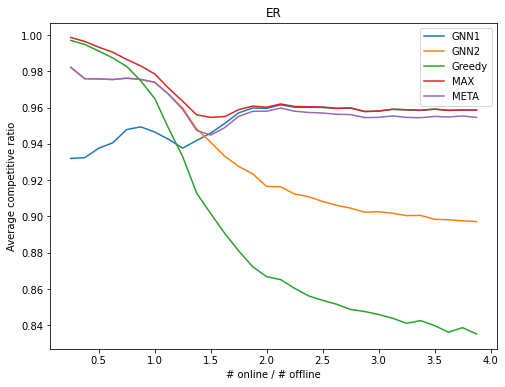

BA


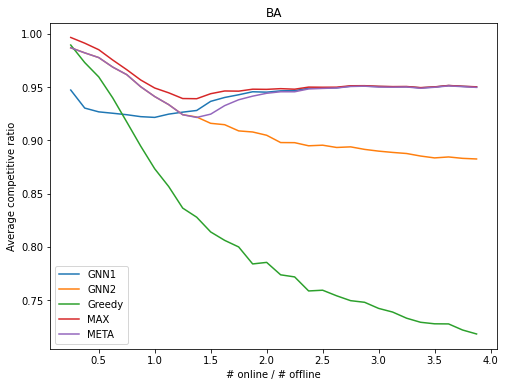

GEOM


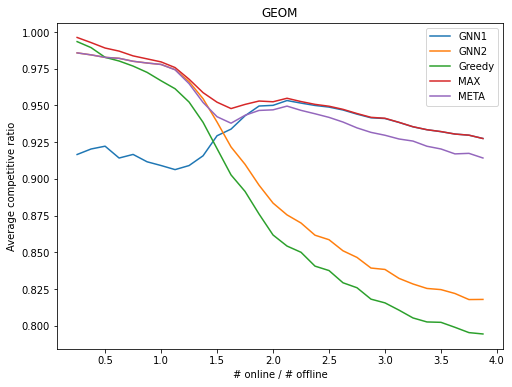

In [24]:
import matplotlib.pyplot as plt
for graph_type, comp_ratios in data.items():
    greedy_avg_ratios = []
    meta_avg_ratios = []
    gnn1_avg_ratios = []
    gnn2_avg_ratios = []
    max_avg_ratios = []

    for trial_ratios in comp_ratios:
        meta_avg_ratios.append(np.array(trial_ratios[0]).mean())
        gnn1_avg_ratios.append(np.array(trial_ratios[1]).mean())
        gnn2_avg_ratios.append(np.array(trial_ratios[2]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[3]).mean())
        max_avg_ratios.append(np.array(np.max(trial_ratios[:, 1:], axis=0)).mean())

    print(graph_type)
    fig = plt.figure(figsize=(8,6))
    plt.title(graph_type)
    plt.plot(ratios, gnn1_avg_ratios, label='GNN1')
    plt.plot(ratios, gnn2_avg_ratios, label='GNN2')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, max_avg_ratios, label='MAX')
    plt.plot(ratios, meta_avg_ratios, label='META')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.show()


In [30]:
comp = np.vstack([gnn1_learned_ratios, gnn2_learned_ratios, greedy_ratios]).T
comp[:10]

array([[0.96383927, 0.90464023, 0.90173902],
       [0.91961679, 0.96354857, 0.92220144],
       [0.95997723, 0.96548942, 0.92763127],
       [0.98775632, 0.9753434 , 0.91434085],
       [0.96692595, 0.94772535, 0.95888952],
       [0.97780104, 0.99435723, 0.98664144],
       [0.96231671, 0.98449421, 0.88154904],
       [0.88609351, 0.90669204, 0.95826781],
       [0.96736736, 0.93306944, 0.90712054],
       [0.97132846, 0.93086561, 0.95612888]])

In [32]:
print(np.max(comp[:2, :], axis=1).mean())
print(comp.mean(axis=0))

0.9636939203369084
[0.95816812 0.9499581  0.92323475]


In [29]:
index1 = np.argmax(comp[:, 0] - comp[:, 1])
index2 = np.argmax(comp[:, 1] - comp[:, 0])

In [30]:
tc._featurize(instances[index1])

array([1.        , 0.71468068, 1.        , 0.0625    , 0.0625    ,
       0.0625    , 0.0625    , 0.0625    , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.32779048,
       0.        , 0.32779048, 0.        , 0.32779048, 0.        ,
       0.32779048, 0.        , 0.32779048])

In [31]:
tc._featurize(instances[index2])

array([1.        , 0.73644835, 1.        , 0.0625    , 0.0625    ,
       0.0625    , 0.0625    , 0.0625    , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.24872903,
       0.        , 0.24872903, 0.        , 0.24872903, 0.        ,
       0.24872903, 0.        , 0.24872903])

In [32]:
GNN2_features = []
GNN1_features = []
for i, boolean in enumerate(comp[:, 1] > comp[:, 0]):
    if boolean:
        GNN2_features.append(tc._featurize(instances[i]))
    else:
        GNN1_features.append(tc._featurize(instances[i]))

out1 = np.vstack(GNN1_features)
out2 = np.vstack(GNN2_features)


In [33]:
out1.mean(axis=0)

array([1.        , 0.74946301, 1.        , 0.0625    , 0.0625    ,
       0.0625    , 0.0625    , 0.0625    , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.27431988,
       0.        , 0.27431988, 0.        , 0.27431988, 0.        ,
       0.27431988, 0.        , 0.27431988])

In [34]:
out2.mean(axis=0)

array([1.        , 0.73912844, 1.        , 0.0625    , 0.0625    ,
       0.0625    , 0.0625    , 0.0625    , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.22597329,
       0.        , 0.22597329, 0.        , 0.22597329, 0.        ,
       0.22597329, 0.        , 0.22597329])